In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output

In [84]:
data = {
    'tra':
    pd.read_csv('input/air_visit_data.csv'),
    'as':
    pd.read_csv('input/air_store_info.csv'),
    'hs':
    pd.read_csv('input/hpg_store_info.csv'),
    'ar':
    pd.read_csv('input/air_reserve.csv'),
    'hr':
    pd.read_csv('input/hpg_reserve.csv'),
    'id':
    pd.read_csv('input/store_id_relation.csv'),
    'tes':
    pd.read_csv('input/sample_submission.csv'),
    'hol':
    pd.read_csv('input/date_info.csv').rename(columns={
        'calendar_date' : 'visit_date'
    })
}
print(check_output(["ls","input"]).decode("utf8"))

air_reserve.csv
air_store_info.csv
air_visit_data.csv
date_info.csv
hpg_reserve.csv
hpg_store_info.csv
sample_submission.csv
store_id_relation.csv



In [15]:
plt.rcParams['figure.figsize'] = 16 , 8

In [85]:
data['ar'].tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [89]:
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date']).dt.date
data['tra'].tail()

,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5


In [17]:
data['hol'].head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [19]:
data['tra'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [23]:
air_visit_date = pd.merge(data['tra'],data['hol'],how = 'left' , left_on = 'visit_date' , right_on = 'visit_date')

In [24]:
air_visit_date.loc[air_visit_date['holiday_flg'] != 0].sort_values('visitors',ascending=False).head(10)

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
28265,air_df554c4527a1cfe6,2016-12-30,205,Friday,1
138181,air_47070be6093f123e,2016-10-10,201,Monday,1
180062,air_8e492076a1179383,2017-01-02,199,Monday,1
28264,air_df554c4527a1cfe6,2016-12-29,182,Thursday,1
8857,air_7514d90009613cd6,2016-12-31,181,Saturday,1
8855,air_7514d90009613cd6,2016-12-29,168,Thursday,1
48491,air_fe58c074ec1445ea,2016-04-29,168,Friday,1
231420,air_5e939e005bd34633,2016-03-20,168,Sunday,1
8335,air_37189c92b6c761ec,2016-01-11,167,Monday,1
189786,air_cadf9cfb510a1d78,2016-05-05,167,Thursday,1


In [41]:
day_wise_df = air_visit_date.loc[air_visit_date['holiday_flg'] != 0].groupby('day_of_week').agg(sum)

In [42]:
sorter = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
# print(sorterIndex)
# print(day_wise_df.sort_values('visitors',ascending=False))
day_wise_df['day_id'] = day_wise_df.index
# print(day_wise_df['day_id'])
day_wise_df['day_id'] = day_wise_df['day_id'].map(sorterIndex)
# print(day_wise_df['day_id'])

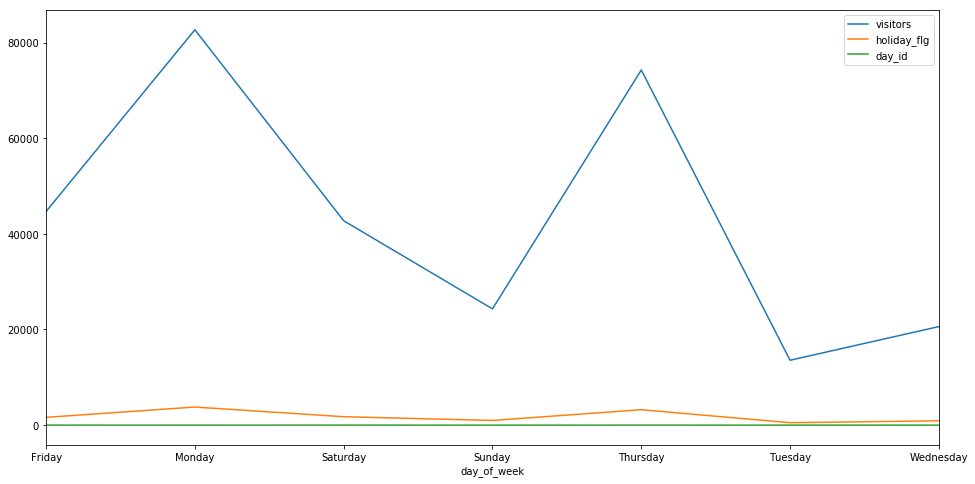

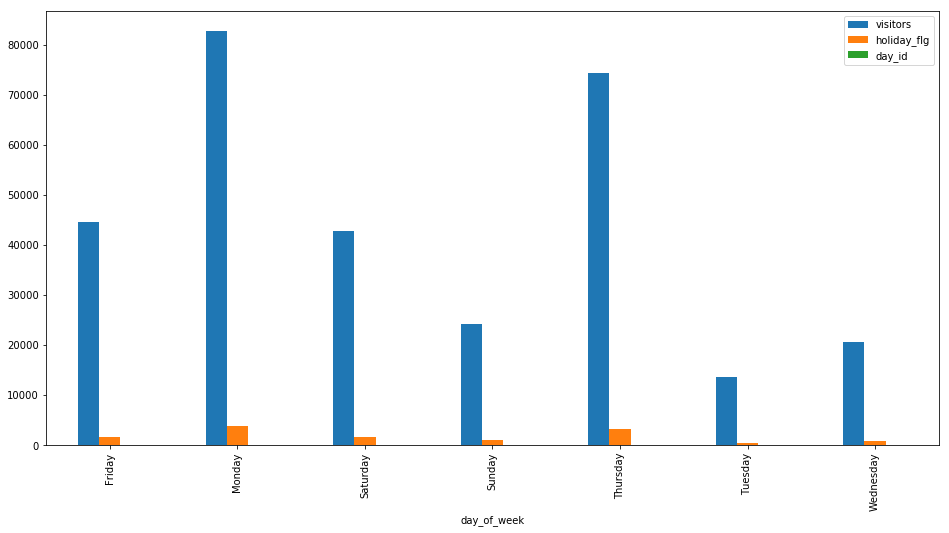

In [43]:
day_wise_df.plot()
day_wise_df.plot(kind = 'bar')

In [44]:
day_wise_df

,visitors,holiday_flg,day_id
day_of_week,,,
Friday,44667,1628,5
Monday,82665,3780,1
Saturday,42738,1756,6
Sunday,24310,977,0
Thursday,74258,3221,4
Tuesday,13568,507,2
Wednesday,20604,906,3


In [45]:
day_wise_df.head()

,visitors,holiday_flg,day_id
day_of_week,,,
Friday,44667,1628,5
Monday,82665,3780,1
Saturday,42738,1756,6
Sunday,24310,977,0
Thursday,74258,3221,4


In [46]:
day_wise_df.sort_values('day_id',inplace=True)

In [47]:
day_wise_df

,visitors,holiday_flg,day_id
day_of_week,,,
Sunday,24310,977,0
Monday,82665,3780,1
Tuesday,13568,507,2
Wednesday,20604,906,3
Thursday,74258,3221,4
Friday,44667,1628,5
Saturday,42738,1756,6


In [48]:
air_visit_date.loc[air_visit_date['holiday_flg'] == 0].sort_values('visitors',ascending=False).head(10)

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
85314,air_cfdeb326418194ff,2017-03-08,877,Wednesday,0
214825,air_8c3175aa5e4fc569,2017-04-18,777,Tuesday,0
72836,air_f2985de32bb792e0,2016-07-10,675,Sunday,0
172123,air_eca5e0064dc9314a,2016-08-30,627,Tuesday,0
143894,air_43d577e0c9460e64,2016-01-24,514,Sunday,0
167504,air_9828505fefc77d75,2016-11-19,409,Saturday,0
147739,air_e42bdc3377d1eee7,2016-12-14,372,Wednesday,0
151243,air_cb083b4789a8d3a2,2016-01-14,369,Thursday,0
141539,air_07bb665f9cdfbdfb,2016-08-07,351,Sunday,0
200611,air_c6aa2efba0ffc8eb,2017-01-23,348,Monday,0


In [49]:
day_wise_no_holiday_df = air_visit_date.loc[air_visit_date['holiday_flg'] == 0].groupby('day_of_week').agg(sum)

In [55]:
day_wise_no_holiday_df.sort_values('visitors',ascending = False)
# day_wise_no_holiday_df

,visitors,holiday_flg
day_of_week,,
Saturday,990390,0
Friday,886341,0
Sunday,691676,0
Wednesday,687276,0
Thursday,644729,0
Tuesday,622894,0
Monday,461537,0


In [60]:
day_wise_no_holiday_df['day_id'] = day_wise_no_holiday_df.index
day_wise_no_holiday_df['day_id'] = day_wise_no_holiday_df['day_id'].map(sorterIndex)
day_wise_no_holiday_df.sort_values('day_id',inplace=True)

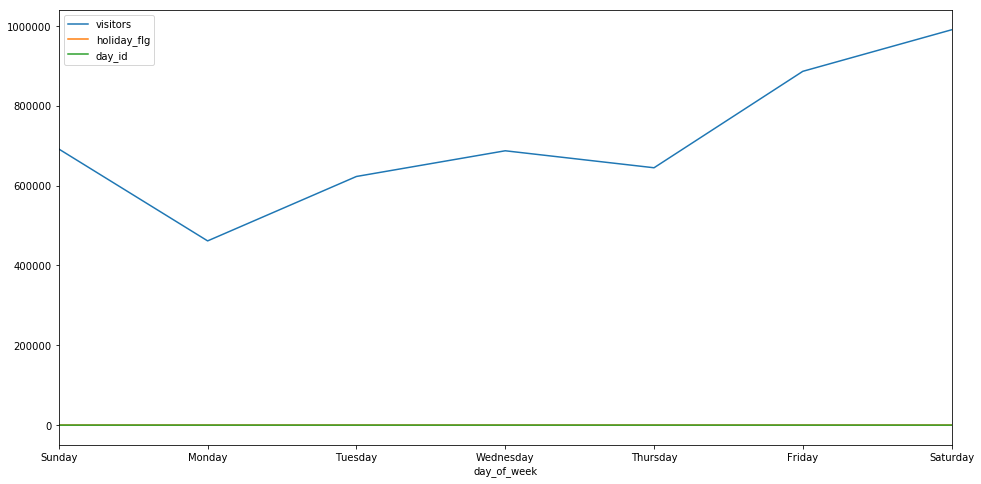

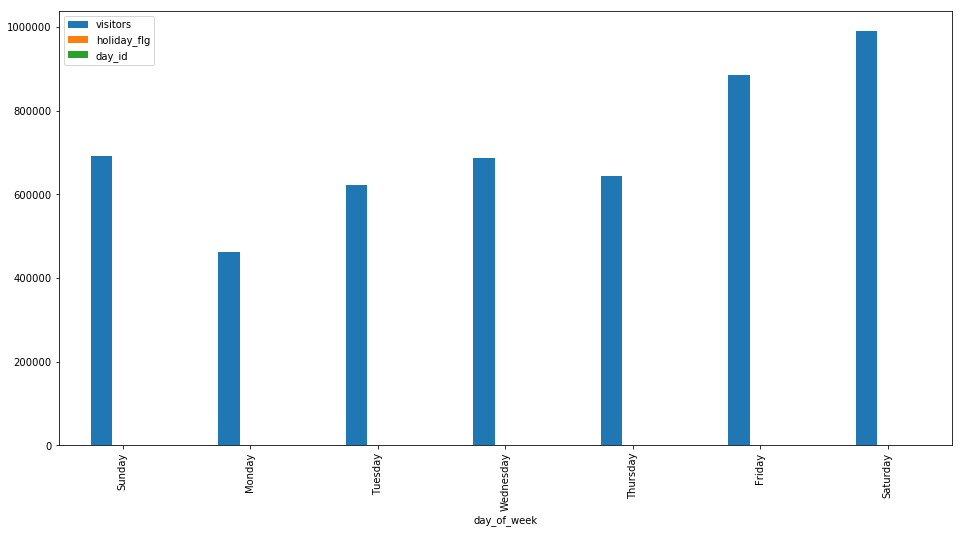

In [62]:
day_wise_no_holiday_df.plot()
day_wise_no_holiday_df.plot(kind = 'bar')

In [68]:
print('Number of entries : ', len(data['ar']))
for col_name in data['ar']:
    print('Number of null entries in {} : {}'.format(col_name,data['ar'][col_name].isnull().sum()))
print('Number of unique store ids : ', len(data['ar']['air_store_id'].unique()))

Number of entries :  92378
Number of null entries in air_store_id : 0
Number of null entries in visit_datetime : 0
Number of null entries in reserve_datetime : 0
Number of null entries in reserve_visitors : 0
Number of unique store ids :  314


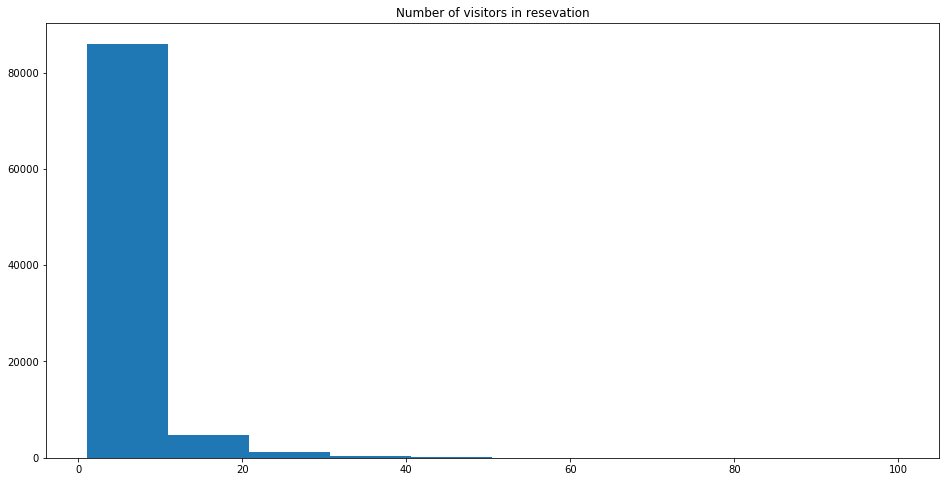

In [72]:
plt.hist(data['ar'].reserve_visitors)
plt.title('Number of visitors in resevation')
plt.show()

In [81]:
visit_hours = [visit_time.to_pydatetime().hour for visit_time in data['ar'].visit_datetime]

AttributeError: 'str' object has no attribute 'to_pydatetime'

In [95]:
len(data['as']['air_genre_name'].unique())
for name in data['as']['air_genre_name'].unique():
    print(name)

Italian/French
Dining bar
Yakiniku/Korean food
Cafe/Sweets
Izakaya
Okonomiyaki/Monja/Teppanyaki
Bar/Cocktail
Japanese food
Creative cuisine
Other
Western food
International cuisine
Asian
Karaoke/Party


In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 10, random_state = 0).fit(data['as'][['longitude','latitude']])
data['as']['cluster'] = kmeans.predict(data['as'][['longitude','latitude']])

In [100]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


In [104]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection = 'aeqd',width=2000000,height = 2000000,lat_0 = 37.5,lon_0 = 138.2)

/Users/kokimadono/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/kokimadono/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/kokimadono/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


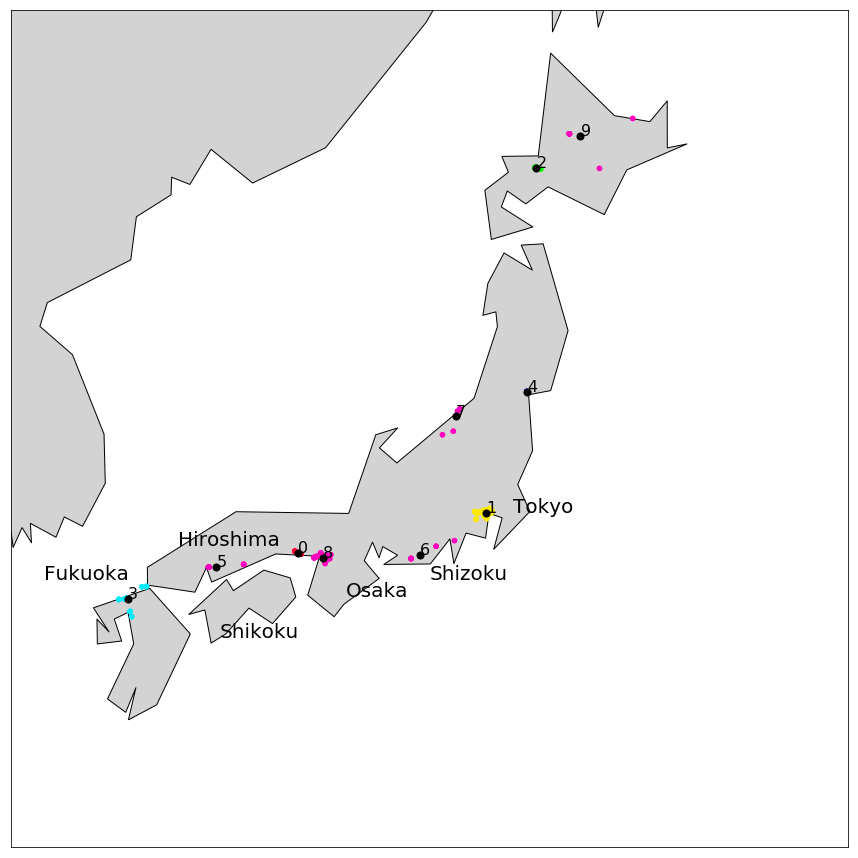

In [107]:
cx = [c[0] for c in kmeans.cluster_centers_]
cy = [c[1] for c in kmeans.cluster_centers_]
cm = plt.get_cmap('gist_rainbow')
colors = [cm(2.*i/10) for i in range(10)]
colored = [colors[k] for k in data['as']['cluster']]
f,axa = plt.subplots(1,1,figsize=(15,16))
m.drawcoastlines()
m.fillcontinents(color='lightgray',lake_color='aqua',zorder=1)
m.scatter(data['as'].longitude.values,data['as'].latitude.values,color=colored,s=20,alpha=1,zorder=999,latlon=True)
m.scatter(cx,cy,color='Black',s=50,alpha=1,latlon=True,zorder=9999)
plt.setp(axa.get_yticklabels(), visible=True)
plt.annotate('Fukuoka', xy=(0.04, 0.32), xycoords='axes fraction',fontsize=20)
plt.annotate('Shikoku', xy=(0.25, 0.25), xycoords='axes fraction',fontsize=20)
plt.annotate('Hiroshima', xy=(0.2, 0.36), xycoords='axes fraction',fontsize=20)
plt.annotate('Osaka', xy=(0.40, 0.30), xycoords='axes fraction',fontsize=20)

plt.annotate('Tokyo', xy=(0.60, 0.4), xycoords='axes fraction',fontsize=20)
plt.annotate('Shizoku', xy=(0.50, 0.32), xycoords='axes fraction',fontsize=20)

for i in range(len(cx)):
    xpt,ypt = m(cx[i],cy[i])
    plt.annotate(i, (xpt+500,ypt+500),zorder=99999,fontsize=16)
plt.show()

In [108]:
airgenres = data['as']['air_genre_name'].unique()

In [109]:
def genre2num(genre):
    return np.where(airgenres == genre)[0][0]

In [110]:
def num2genre(num):
    return airgenres[num]

In [112]:
gencodes = [genre2num(genre) for genre in data['as']['air_genre_name']]
data['as']['air_genre_name'] = gencodes

In [113]:
data['as'].head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,cluster
0,air_0f0cdeee6c9bf3d7,0,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,8
1,air_7cc17a324ae5c7dc,0,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,8
2,air_fee8dcf4d619598e,0,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,8
3,air_a17f0778617c76e2,0,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,8
4,air_83db5aff8f50478e,0,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1


In [115]:
final = pd.merge(data['as'],data['tra']).drop(['latitude','longitude'],axis = 1)
final.head()

,air_store_id,air_genre_name,air_area_name,cluster,visit_date,visitors
0,air_0f0cdeee6c9bf3d7,0,Hyōgo-ken Kōbe-shi Kumoidōri,8,2016-07-01,18
1,air_0f0cdeee6c9bf3d7,0,Hyōgo-ken Kōbe-shi Kumoidōri,8,2016-07-02,37
2,air_0f0cdeee6c9bf3d7,0,Hyōgo-ken Kōbe-shi Kumoidōri,8,2016-07-03,20
3,air_0f0cdeee6c9bf3d7,0,Hyōgo-ken Kōbe-shi Kumoidōri,8,2016-07-04,16
4,air_0f0cdeee6c9bf3d7,0,Hyōgo-ken Kōbe-shi Kumoidōri,8,2016-07-05,15


In [123]:
vdt = pd.to_datetime(final.visit_date)
final['vd'] = vdt.dt.date
final['yday'] = vdt.dt.dayofyear
final['wday'] = vdt.dt.dayofweek
final = final.drop(['vd'],axis = 1)
dts  = pd.to_datetime(data['hol'].visit_date)